In [1]:
from google.colab import files
uploaded = files.upload()  # Manually upload the .bag file

Saving data1.bag to data1.bag


In [2]:
!pip install rosbags bagpy pandas numpy matplotlib
from rosbags.highlevel import AnyReader
import pandas as pd
from pathlib import Path


bag_path = Path("/content/data1.bag")  # Replace with your file path


if not bag_path.exists():
    raise FileNotFoundError(f"File not found: {bag_path}")

# Open the bag file and list available topics
with AnyReader([bag_path]) as reader:
    print("Available Topics:")
    for connection in reader.connections:
        print(f"Topic: {connection.topic}, Type: {connection.msgtype}")






# Convert to DataFrame
df = pd.DataFrame(data)
print(df.head())  # Display first few rows

cmd_data = []



df_cmd = pd.DataFrame(cmd_data, columns=["Linear Velocity", "Angular Velocity"])
print(df_cmd.head())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━

NameError: name 'data' is not defined

       Linear Velocity     Angular Velocity   Total Power
0  1742162539915940495  1742162539915940495  0.000000e+00
1  1742162539950105870  1742162539950105870  6.547380e+27
2  1742162539983704128  1742162539983704128  6.438699e+27
3  1742162540016447254  1742162540016447254  6.274823e+27
4  1742162540050081515  1742162540050081515  6.445598e+27


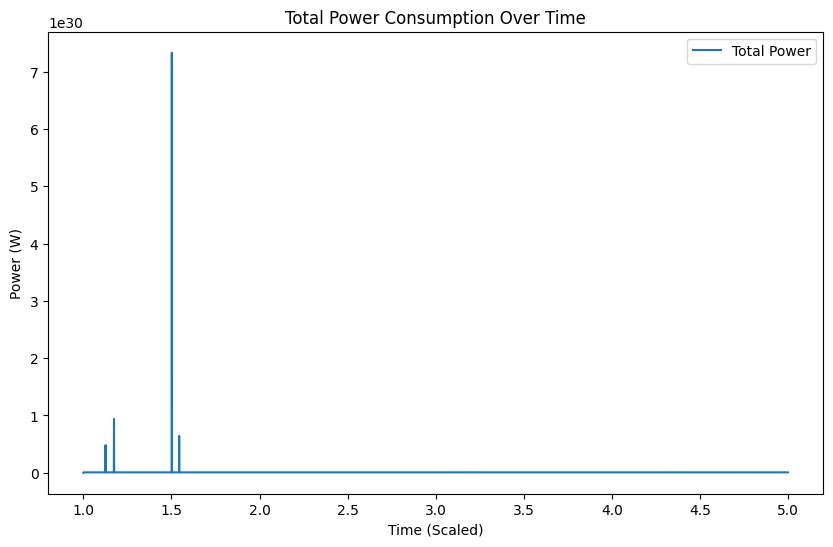

In [29]:
import numpy as np

# Robot's mass (in kg) and moment of inertia (in kg*m^2) – You'll need to adjust these values based on the robot's characteristics
m = 1.0  # mass of the robot in kg (change as per your robot)
I = 0.1  # moment of inertia in kg*m^2 (change as per your robot)

# Time difference between consecutive measurements (assuming data is sampled at regular intervals)
# You can set this to the time between your data points or calculate the time differences based on timestamps
delta_t = 0.01  # Assuming 1 second between each measurement (change as needed)

# Calculate linear acceleration (change in linear velocity)
linear_acceleration = np.diff(df_cmd["Linear Velocity"]) / delta_t

# Calculate angular acceleration (change in angular velocity)
angular_acceleration = np.diff(df_cmd["Angular Velocity"]) / delta_t

# Calculate linear power consumption (P_linear = m * v * a)
linear_power = m * df_cmd["Linear Velocity"].iloc[1:].values * linear_acceleration

# Calculate angular power consumption (P_angular = I * omega * alpha)
angular_power = I * df_cmd["Angular Velocity"].iloc[1:].values * angular_acceleration

# Total power consumption is the sum of linear and angular power
total_power = linear_power + angular_power

# Display the total power consumption
df_cmd["Total Power"] = np.concatenate(([0], total_power))  # Add 0 for the first row where we don't have power data
print(df_cmd[["Linear Velocity", "Angular Velocity", "Total Power"]].head())

# You can also plot the total power consumption over time
import matplotlib.pyplot as plt

# Define your scaling range
min_new = 1  # New minimum time
max_new = 5  # New maximum time

# Scale the index (x-axis) to the new range
df_cmd["scaled_index"] = min_new + ((np.arange(len(df_cmd)) - np.min(np.arange(len(df_cmd)))) /
                                    (np.max(np.arange(len(df_cmd))) - np.min(np.arange(len(df_cmd))))) * (max_new - min_new)

# Plot the total power consumption with the new x-axis
plt.figure(figsize=(10, 6))
plt.plot(df_cmd["scaled_index"], df_cmd["Total Power"], label="Total Power")
plt.title("Total Power Consumption Over Time")
plt.xlabel("Time (Scaled)")
plt.ylabel("Power (W)")
plt.legend()
plt.show()

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare the data
X = df_cmd[["Linear Velocity", "Angular Velocity"]].values
y = df_cmd["Total Power"].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # y needs to be a 2D tensor

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [31]:
class PowerPredictionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(PowerPredictionModel, self).__init__()
        # Define layers
        self.hidden_layer = nn.Linear(input_dim, hidden_dim)
        self.output_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Apply activation functions (ReLU)
        hidden_out = torch.relu(self.hidden_layer(x))
        output = self.output_layer(hidden_out)
        return output

# Define the model
input_dim = X_train.shape[1]  # Number of features (2: Linear and Angular Velocity)
hidden_dim = 64  # Number of neurons in the hidden layer
output_dim = 1  # Predicting a single value (power)

model = PowerPredictionModel(input_dim, hidden_dim, output_dim)


In [42]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr= 1e-5)

# Train the model
num_epochs = 500




for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()


    if (epoch+1) % 50 == 0:  # Print every 50 epochs
        print(f"Epoch {epoch+1}: Loss: {loss.item()}, Gradients: {model.output_layer.weight.grad}")



Epoch 50: Loss: inf, Gradients: tensor([[-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., -0., 0., -0., -0., -0., -0.,
         -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., 0., -0., -0., -0., -0., -0., -0.,
         -0., -0., -0., -0., -0., 0., 0., -0., 0., -0., -0., -0., -0., -0., -0., -0.]])
Epoch 100: Loss: inf, Gradients: tensor([[-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., -0., 0., -0., -0., -0., -0.,
         -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., 0., -0., -0., -0., -0., -0., -0.,
         -0., -0., -0., -0., -0., 0., 0., -0., 0., -0., -0., -0., -0., -0., -0., -0.]])
Epoch 150: Loss: inf, Gradients: tensor([[-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0., -0., 0., -0., -0., -0., -0.,
         -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., 0., -0.

Test Loss: inf


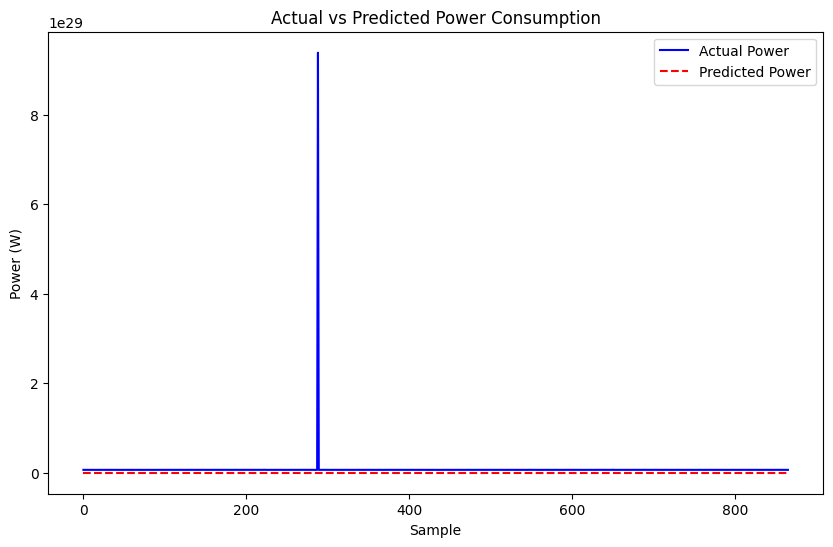

In [33]:
# Evaluate the model on the test data
with torch.no_grad():  # No need to track gradients for evaluation
    model.eval()
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

    # Convert predictions to numpy for plotting
    predictions = predictions.numpy()

    # Plot the actual vs predicted power
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label="Actual Power", color="blue")
    plt.plot(predictions, label="Predicted Power", color="red", linestyle="--")
    plt.legend()
    plt.xlabel("Sample")
    plt.ylabel("Power (W)")
    plt.title("Actual vs Predicted Power Consumption")
    plt.show()
